# Trabalho de Mineração de dados
* João Paulo Dutra Kreling
* Guilherme Zafra Garcia
* Marlon Alves Bomfim

### Utilização da base do ENADE para Clustering

In [ ]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#verificação da versão do Python
from platform import python_version
print(python_version())

3.7.12


In [ ]:
#importando a base de dados
df = pd.read_csv('/content/drive/MyDrive/TrabalhoDM/microdados_enade_2019.txt', sep=';', decimal=',')

### Análise de dados

In [ ]:
df.head(5)

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,NU_IDADE,TP_SEXO,ANO_FIM_EM,ANO_IN_GRAD,CO_TURNO_GRADUACAO,TP_INSCRICAO_ADM,TP_INSCRICAO,NU_ITEM_OFG,NU_ITEM_OFG_Z,NU_ITEM_OFG_X,NU_ITEM_OFG_N,NU_ITEM_OCE,NU_ITEM_OCE_Z,NU_ITEM_OCE_X,NU_ITEM_OCE_N,DS_VT_GAB_OFG_ORIG,DS_VT_GAB_OFG_FIN,DS_VT_GAB_OCE_ORIG,DS_VT_GAB_OCE_FIN,DS_VT_ESC_OFG,DS_VT_ACE_OFG,DS_VT_ESC_OCE,DS_VT_ACE_OCE,TP_PRES,TP_PR_GER,TP_PR_OB_FG,TP_PR_DI_FG,TP_PR_OB_CE,TP_PR_DI_CE,TP_SFG_D1,...,QE_I29,QE_I30,QE_I31,QE_I32,QE_I33,QE_I34,QE_I35,QE_I36,QE_I37,QE_I38,QE_I39,QE_I40,QE_I41,QE_I42,QE_I43,QE_I44,QE_I45,QE_I46,QE_I47,QE_I48,QE_I49,QE_I50,QE_I51,QE_I52,QE_I53,QE_I54,QE_I55,QE_I56,QE_I57,QE_I58,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
0,2019,1,10002,10028,5710,3,1,5103403,51,5,27,M,2010,2012.0,3.0,1,0,8,1,0,0,27,0,7,0,ZDCBCCDB,ZDCBCCDB,ABECDDEABDECCBCDEBAEDCDBAAA,ABEXDDEABDECXXXDXBAEDCXXAAA,DACBCBDD,80111010.0,ABEEDDDAADEAEECBBABECCACBAA,111911010110999090010199011,555,555,555,555,555,555,336,...,7.0,1.0,3.0,5.0,7.0,7.0,1.0,1.0,2.0,6.0,4.0,1.0,3.0,6.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,6.0,2.0,1.0,8.0,1.0,3.0,2.0,5.0,6.0,2.0,5.0,1.0,1.0,2.0,5.0,8.0,7.0,1.0,2.0
1,2019,1,10002,10028,5710,3,1,5103403,51,5,26,M,2009,2015.0,3.0,1,0,8,1,0,0,27,0,7,0,ZDCBCCDB,ZDCBCCDB,ABECDDEABDECCBCDEBAEDCDBAAA,ABEXDDEABDECXXXDXBAEDCXXAAA,CDCBDCBC,81110100.0,ABCECDEBAABCCCDDDBAEDCBADDA,110901100001999191111199001,555,555,555,555,555,555,555,...,2.0,1.0,3.0,2.0,3.0,3.0,1.0,2.0,1.0,2.0,3.0,2.0,1.0,6.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,5.0,3.0,1.0,2.0,7.0,2.0,1.0,4.0,3.0,1.0,4.0,2.0,2.0,2.0,5.0,4.0,4.0,2.0,2.0
2,2019,1,10002,10028,5710,3,1,5103403,51,5,23,M,2012,2016.0,3.0,1,0,8,1,0,0,27,0,7,0,ZDCBCCDB,ZDCBCCDB,ABECDDEABDECCBCDEBAEDCDBAAA,ABEXDDEABDECXXXDXBAEDCXXAAA,NaN,NaN,NaN,NaN,222,222,222,222,222,222,222,...,2.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,6.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,6.0,3.0,1.0,1.0,2.0,2.0,2.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,4.0,1.0,1.0,1.0,4.0
3,2019,1,10002,10028,5710,3,1,5103403,51,5,24,M,2013,2014.0,3.0,1,0,8,1,0,0,27,0,7,0,ZDCBCCDB,ZDCBCCDB,ABECDDEABDECCBCDEBAEDCDBAAA,ABEXDDEABDECXXXDXBAEDCXXAAA,ADCCACEB,81100101.0,EEEEAEDABAEADAEDACABDCCCDDC,001900011010999190101199000,555,555,555,555,555,555,555,...,3.0,2.0,4.0,5.0,5.0,4.0,5.0,4.0,3.0,2.0,3.0,3.0,4.0,6.0,4.0,4.0,8.0,3.0,3.0,2.0,2.0,8.0,8.0,3.0,1.0,1.0,3.0,3.0,4.0,3.0,3.0,5.0,2.0,2.0,2.0,3.0,3.0,4.0,3.0,3.0
4,2019,1,10002,10028,5710,3,1,5103403,51,5,41,M,2012,2013.0,3.0,1,0,8,1,0,0,27,0,7,0,ZDCBCCDB,ZDCBCCDB,ABECDDEABDECCBCDEBAEDCDBAAA,ABEXDDEABDECXXXDXBAEDCXXAAA,NaN,NaN,NaN,NaN,222,222,222,222,222,222,222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


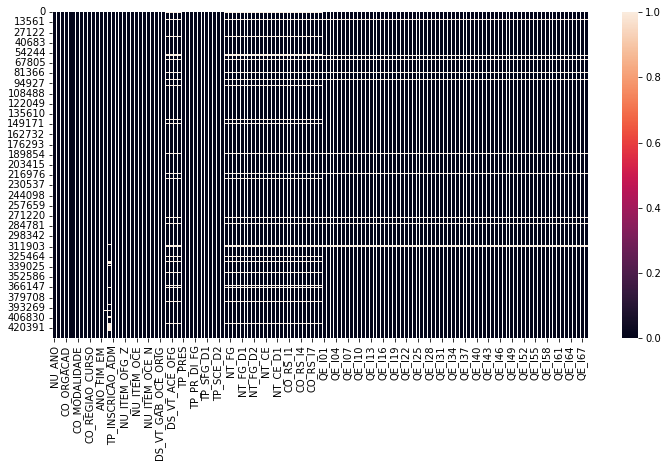

In [ ]:
#criação do Heatmap para avaliação dos dados faltantes
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar = True);

In [ ]:
#contagem dos dados faltantes
new = df.isnull().sum()
print(new.sum())

3064184


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433930 entries, 0 to 433929
Columns: 137 entries, NU_ANO to QE_I68
dtypes: float64(62), int64(33), object(42)
memory usage: 453.6+ MB


### Remoção de Colunas de dados faltantes

In [ ]:
#Criação das colunas que serão removidas, por não conter informações para utilização de dados socioeconômicos
colunas = ['NU_ANO', 'CO_IES', 'CO_CATEGAD', 'CO_ORGACAD', 'CO_MUNIC_CURSO', 'CO_UF_CURSO',
           'CO_REGIAO_CURSO', 'NU_ITEM_OFG', 'NU_ITEM_OFG_Z', 'NU_ITEM_OFG_X', 'NU_ITEM_OFG_N',
           'NU_ITEM_OFG_N', 'NU_ITEM_OFG_N', 'NU_ITEM_OCE_X', 'NU_ITEM_OCE_N', 'DS_VT_GAB_OFG_ORIG',
           'DS_VT_GAB_OFG_FIN', 'DS_VT_GAB_OCE_ORIG', 'DS_VT_GAB_OCE_FIN', 'DS_VT_ESC_OFG',
           'DS_VT_ACE_OFG', 'DS_VT_ESC_OCE', 'DS_VT_ACE_OCE', 'TP_PRES', 'TP_PR_GER', 'TP_PR_OB_FG',
           'TP_PR_DI_FG', 'TP_PR_OB_CE', 'TP_PR_DI_CE', 'TP_SFG_D1', 'TP_SFG_D2', 'TP_SCE_D1',
           'TP_SCE_D2', 'TP_SCE_D3', 'CO_RS_I1', 'CO_RS_I2', 'CO_RS_I3', 'CO_RS_I4', 'CO_RS_I5',
           'CO_RS_I6', 'CO_RS_I7', 'CO_RS_I8', 'CO_RS_I9', 'QE_I25', 'QE_I26', 'QE_I27', 'QE_I28',
           'QE_I29', 'QE_I30', 'QE_I31', 'QE_I32', 'QE_I33', 'QE_I34', 'QE_I35', 'QE_I36', 'QE_I37',
           'QE_I38', 'QE_I39', 'QE_I40', 'QE_I41', 'QE_I42', 'QE_I43', 'QE_I44', 'QE_I45', 'QE_I46',
           'QE_I47', 'QE_I48', 'QE_I49', 'QE_I50', 'QE_I51', 'QE_I52', 'QE_I53', 'QE_I54', 'QE_I55',
           'QE_I56', 'QE_I57', 'QE_I58', 'QE_I59', 'QE_I60', 'QE_I61', 'QE_I62', 'QE_I63', 'QE_I64',
           'QE_I65', 'QE_I66', 'QE_I67', 'QE_I68', 'CO_CURSO', 'TP_INSCRICAO_ADM', 'TP_INSCRICAO',
           'NU_ITEM_OCE', 'NU_ITEM_OCE_Z', 'NT_GER', 'NT_FG', 'NT_OBJ_FG', 'NT_DIS_FG', 'NT_FG_D1',
           'NT_FG_D1_PT', 'NT_FG_D1_CT', 'NT_FG_D2', 'NT_FG_D2_PT', 'NT_FG_D2_CT', 'NT_CE', 'NT_OBJ_CE',
           'NT_DIS_CE', 'NT_CE_D1', 'NT_CE_D2', 'NT_CE_D3', 'QE_I16', 'QE_I18', 'QE_I09', 'QE_I10',
           'QE_I11', 'QE_I12', 'QE_I13', 'QE_I14']

In [ ]:
df = df.drop(columns=colunas, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433930 entries, 0 to 433929
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CO_GRUPO            433930 non-null  int64  
 1   CO_MODALIDADE       433930 non-null  int64  
 2   NU_IDADE            433930 non-null  int64  
 3   TP_SEXO             433930 non-null  object 
 4   ANO_FIM_EM          433930 non-null  int64  
 5   ANO_IN_GRAD         433562 non-null  float64
 6   CO_TURNO_GRADUACAO  410183 non-null  float64
 7   QE_I01              407875 non-null  object 
 8   QE_I02              407874 non-null  object 
 9   QE_I03              407875 non-null  object 
 10  QE_I04              407876 non-null  object 
 11  QE_I05              407876 non-null  object 
 12  QE_I06              407876 non-null  object 
 13  QE_I07              407877 non-null  object 
 14  QE_I08              407873 non-null  object 
 15  QE_I15              407873 non-nul

In [ ]:
# verificação dos dados faltantes remanescentes
new_coluna = df.isna().sum()
print(new_coluna.sum())

441017


In [ ]:
df = df.dropna(axis=0)
df.head(3)

,CO_GRUPO,CO_MODALIDADE,NU_IDADE,TP_SEXO,ANO_FIM_EM,ANO_IN_GRAD,CO_TURNO_GRADUACAO,QE_I01,QE_I02,QE_I03,QE_I04,QE_I05,QE_I06,QE_I07,QE_I08,QE_I15,QE_I17,QE_I19,QE_I20,QE_I21,QE_I22,QE_I23,QE_I24
0,5710,1,27,M,2010,2012.0,3.0,E,C,A,D,E,C,D,B,A,B,B,G,A,B,D,A
1,5710,1,26,M,2009,2015.0,3.0,A,A,A,E,D,B,B,E,A,B,A,C,A,B,D,C
2,5710,1,23,M,2012,2016.0,3.0,A,A,A,E,E,B,D,E,D,A,B,C,A,D,B,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387351 entries, 0 to 433929
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CO_GRUPO            387351 non-null  int64  
 1   CO_MODALIDADE       387351 non-null  int64  
 2   NU_IDADE            387351 non-null  int64  
 3   TP_SEXO             387351 non-null  object 
 4   ANO_FIM_EM          387351 non-null  int64  
 5   ANO_IN_GRAD         387351 non-null  float64
 6   CO_TURNO_GRADUACAO  387351 non-null  float64
 7   QE_I01              387351 non-null  object 
 8   QE_I02              387351 non-null  object 
 9   QE_I03              387351 non-null  object 
 10  QE_I04              387351 non-null  object 
 11  QE_I05              387351 non-null  object 
 12  QE_I06              387351 non-null  object 
 13  QE_I07              387351 non-null  object 
 14  QE_I08              387351 non-null  object 
 15  QE_I15              387351 non-nul

In [ ]:
#Verificação das colunas remanescentes
df.columns

Index(['CO_GRUPO', 'CO_MODALIDADE', 'NU_IDADE', 'TP_SEXO', 'ANO_FIM_EM',
       'ANO_IN_GRAD', 'CO_TURNO_GRADUACAO', 'QE_I01', 'QE_I02', 'QE_I03',
       'QE_I04', 'QE_I05', 'QE_I06', 'QE_I07', 'QE_I08', 'QE_I15', 'QE_I17',
       'QE_I19', 'QE_I20', 'QE_I21', 'QE_I22', 'QE_I23', 'QE_I24'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


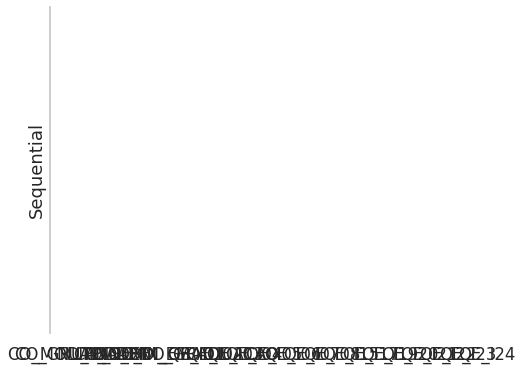

In [ ]:
sns.set(style="whitegrid", context="talk")
f, (ax1) = plt.subplots(1, 1, figsize=(8, 6))
x = np.array(df.columns)
sns.barplot(x, df.isnull().sum(), palette="BuGn_d", ax=ax1)
ax1.set_ylabel("Sequential")
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.show()

In [ ]:
#Dicionário de dados para replace
genero = {'F': 0, 'M': 1}
questionario = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7, 'H' : 7, 'I' : 8, 'J' : 9, 'K' : 10, 'L' : 11, 'M' : 12}
texto_colunas = {'CO_GRUPO': 'CodCurso', 'CO_MODALIDADE': 'Modalidade', 'NU_IDADE': 'Idade', 'TP_SEXO': 'Sexo', 'ANO_FIM_EM': 'ConclusaoEnsMed',
       'ANO_IN_GRAD': 'AnoIngressoGrad', 'CO_TURNO_GRADUACAO': 'TurnoGraduacao', 'QE_I01':'EstadoCivil', 'QE_I02': 'CorRaca', 'QE_I03': 'Nacionalidade',
       'QE_I04':'EscolaridadePai', 'QE_I05':'EscolaridadeMae', 'QE_I06':'ComQuemMora', 'QE_I07':'QuantasPessoas', 'QE_I08':'Renda',
       'QE_I15':'FormaIngresso', 'QE_I17':'TipoEscMed', 'QE_I19':'IncentivoGrad', 'QE_I20':'EnfrentarDific',
       'QE_I21':'FamiliarComSup', 'QE_I22':'LivrosLidos', 'QE_I23':'HorasEstudo', 'QE_I24':'OportunIdiom'}

In [ ]:
df.TP_SEXO = df.TP_SEXO.replace(genero)
df = df.replace(questionario)

In [ ]:
df.rename(columns=texto_colunas, inplace = True)

In [ ]:
df.head()

,CodCurso,Modalidade,Idade,Sexo,ConclusaoEnsMed,AnoIngressoGrad,TurnoGraduacao,EstadoCivil,CorRaca,Nacionalidade,EscolaridadePai,EscolaridadeMae,ComQuemMora,QuantasPessoas,Renda,FormaIngresso,TipoEscMed,IncentivoGrad,EnfrentarDific,FamiliarComSup,LivrosLidos,HorasEstudo,OportunIdiom
0,5710,1,27,1,2010,2012.0,3.0,5,3,1,4,5,3,4,2,1,2,2,7,1,2,4,1
1,5710,1,26,1,2009,2015.0,3.0,1,1,1,5,4,2,2,5,1,2,1,3,1,2,4,3
2,5710,1,23,1,2012,2016.0,3.0,1,1,1,5,5,2,4,5,4,1,2,3,1,4,2,3
3,5710,1,24,1,2013,2014.0,3.0,1,4,1,6,6,2,3,5,1,2,4,7,1,1,4,1
5,5710,1,26,1,2011,2013.0,3.0,1,1,1,5,5,4,1,3,1,2,2,7,1,3,5,5


In [ ]:
df.describe()

,CodCurso,Modalidade,Idade,Sexo,ConclusaoEnsMed,AnoIngressoGrad,TurnoGraduacao,EstadoCivil,CorRaca,Nacionalidade,EscolaridadePai,EscolaridadeMae,ComQuemMora,QuantasPessoas,Renda,FormaIngresso,TipoEscMed,IncentivoGrad,EnfrentarDific,FamiliarComSup,LivrosLidos,HorasEstudo,OportunIdiom
count,387351.000000,387351.0,387351.000000,387351.000000,387351.000000,387351.000000,387351.000000,387351.000000,387351.000000,387351.000000,387351.000000,387351.000000,387351.000000,387351.000000,387351.000000,387351.000000,387351.000000,387351.000000,387351.000000,387351.000000,387351.000000,387351.000000,387351.000000
mean,2346.487728,1.0,27.078076,0.445160,2010.676593,2014.536031,3.088999,1.276545,2.223325,1.013902,3.589731,3.913804,2.311105,3.331614,3.041846,1.739017,1.622577,2.233519,3.617688,1.286280,2.470834,2.936381,3.969284
std,2767.717789,0.0,6.019124,0.496984,6.091389,21.872062,0.545576,0.726337,1.469223,0.136168,1.285676,1.280387,0.840111,1.565344,1.621006,1.384873,1.011338,1.182056,2.498748,0.452023,1.079191,1.095751,1.611586
min,5.000000,1.0,11.000000,0.000000,1014.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,1.0,23.000000,0.000000,2009.000000,2014.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,3.000000
50%,36.000000,1.0,25.000000,0.000000,2012.000000,2015.000000,3.000000,1.000000,1.000000,1.000000,4.000000,4.000000,2.000000,3.000000,3.000000,1.000000,1.000000,2.000000,3.000000,1.000000,2.000000,3.000000,5.000000
75%,5710.000000,1.0,29.000000,1.000000,2014.000000,2016.000000,3.000000,1.000000,4.000000,1.000000,4.000000,5.000000,3.000000,4.000000,4.000000,1.000000,2.000000,2.000000,4.000000,2.000000,3.000000,4.000000,5.000000
max,6410.000000,1.0,86.000000,1.000000,2254.000000,2092.000000,4.000000,5.000000,6.000000,3.000000,6.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,7.000000,10.000000,2.000000,5.000000,5.000000,5.000000


In [ ]:
df.Sexo.value_counts()

0    214918
1    172433
Name: Sexo, dtype: int64

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df = scaler.fit_transform(df)
#df = pd.DataFrame(df, columns=('CodCurso', 'Modalidade', 'Idade', 'Sexo', 'ConclusaoEnsMed', 
#                               'AnoIngressoGrad', 'TurnoGraduacao', 'EstadoCivil', 'CorRaca',
#                               'Nacionalidade', 'EscolaridadePai', 'EscolaridadeMae', 'ComQuemMora',
#                               'QuantasPessoas', 'Renda', 'SituacaoFinanceira', 'SituacaoTrabalho',
#                               'TipoBolsa', 'BolsaPermanencia', 'BolsaAcadêmica', 'AtividadeExtraCV',
#                               'FormaIngresso', 'UFEnsMed', 'TipoEscMed', 'ModalidadeEnsMed', 'IncentivoGrad',
#                               'EnfrentarDific', 'FamiliarComSup', 'LivrosLidos', 'HorasEstudo', 'OportunIdiom'))
#df

## Treinamento dos dados - Agrupamento

In [ ]:
#import das bibliotecas
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [ ]:
#novo = []
#for i in range(2,10):
#    kmeans = KMeans(n_clusters=i)
#    kmeans.fit(X)
#    novo.append(silhouette_score(X, kmeans.labels_))

In [ ]:
#plt.plot(range(2, 10), novo)
#plt.xlabel('Número de clusters')
#plt.ylabel('Silhouette Score')

In [ ]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df)
kmeans.inertia_
kmeans.cluster_centers_
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

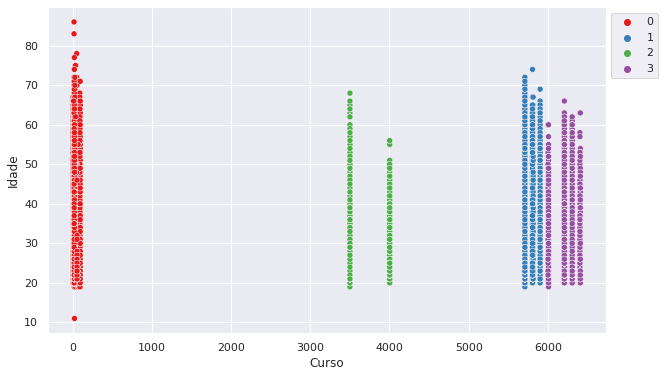

In [ ]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1)
sns.scatterplot(x = df.CodCurso, y = df.Idade, hue = kmeans.labels_, palette='Set1')
plt.xlabel('Curso')
plt.ylabel('Idade')

plt.legend(loc = 2, bbox_to_anchor = (1,1))

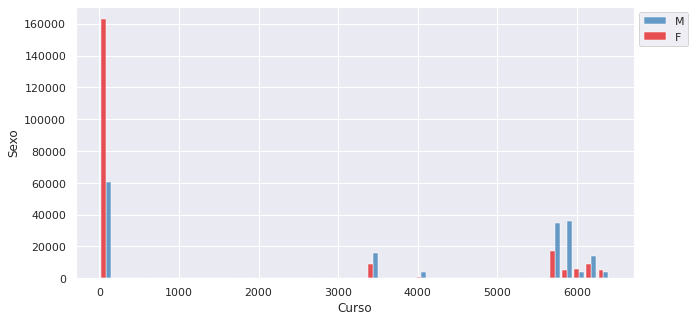

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x = 'CodCurso', hue = 'Sexo', palette='Set1', multiple="dodge", shrink=.8);
plt.xlabel('Curso')
plt.ylabel('Sexo')

plt.legend(loc = 2, bbox_to_anchor = (1,1), labels=['M', 'F'])

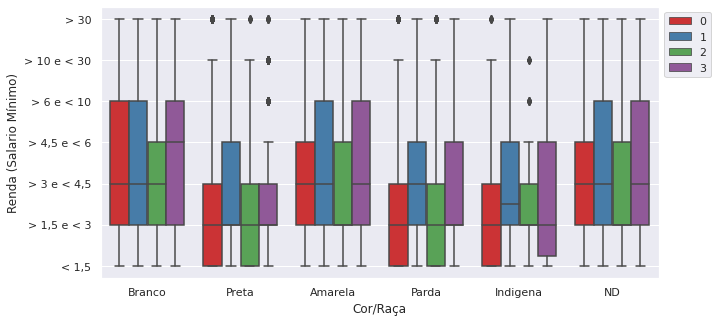

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x = df.CorRaca, y = df.Renda, hue = kmeans.labels_, palette = 'Set1');
plt.xlabel('Cor/Raça')
plt.ylabel('Renda (Salario Mínimo)')
plt.xticks([0,1,2,3,4,5],['Branco', 'Preta', 'Amarela', 'Parda', 'Indigena', 'ND'])
plt.yticks([1,2,3,4,5,6,7],['< 1,5', '> 1,5 e < 3', '> 3 e < 4,5', '> 4,5 e < 6', '> 6 e < 10', '> 10 e < 30', '> 30'])

plt.legend(loc = 2, bbox_to_anchor = (1,1))

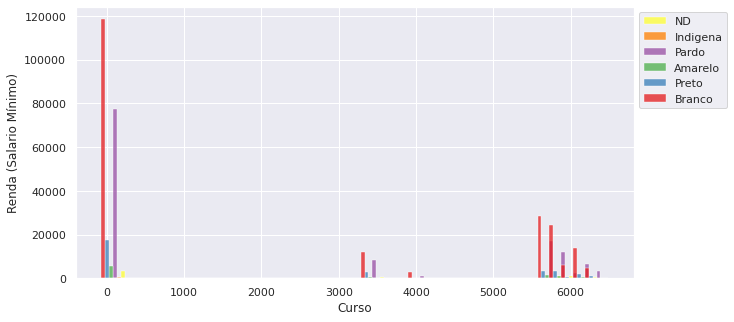

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x = 'CodCurso', hue = 'CorRaca' , palette = 'Set1', multiple="dodge", shrink=2);
plt.xlabel('Curso')
plt.ylabel('Renda (Salario Mínimo)')

plt.legend(loc = 2, bbox_to_anchor = (1,1), labels=['ND', 'Indigena', 'Pardo', 'Amarelo', 'Preto', 'Branco'])

Text(0, 0.5, 'Renda (Salario Mínimo)')

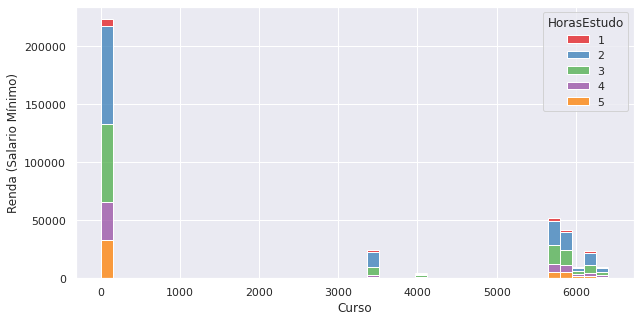

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x = 'CodCurso', hue = 'HorasEstudo' , palette = 'Set1', multiple="stack", shrink=1);
plt.xlabel('Curso')
plt.ylabel('Renda (Salario Mínimo)')

#plt.legend(loc = 2, bbox_to_anchor = (1,1))

([<matplotlib.axis.XTick at 0x7f48653cb4d0>,
 [Text(0, 0, '0'),
  Text(0, 0, '> 0 a < 3'),
  Text(0, 0, '> 4 e < 7'),
  Text(0, 0, '> 8 e < 12'),
  Text(0, 0, '> 12')])

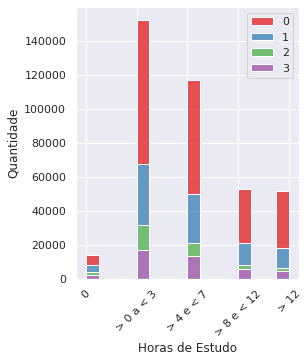

In [ ]:
plt.figure(figsize=(4,5))
sns.histplot(data=df, x = 'HorasEstudo', hue = kmeans.labels_, palette = 'Set1', binwidth=0.25, multiple='stack');
plt.xlabel('Horas de Estudo')
plt.ylabel('Quantidade')
plt.xticks([1,2,3,4,5],['0', '> 0 a < 3', '> 4 e < 7', '> 8 e < 12', '> 12'], rotation=45)

#plt.legend(loc = 2, bbox_to_anchor = (1,1))

([<matplotlib.axis.XTick at 0x7f4865847bd0>,
 [Text(0, 0, '< 1,5'),
  Text(0, 0, '> 1,5 e < 3'),
  Text(0, 0, '> 3 e < 4,5'),
  Text(0, 0, '> 4,5 e < 6'),
  Text(0, 0, '> 6 e < 10'),
  Text(0, 0, '> 10 e < 30'),
  Text(0, 0, '> 30')])

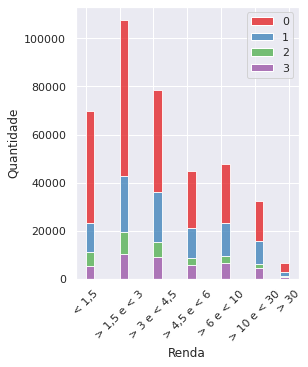

In [ ]:
plt.figure(figsize=(4,5))
sns.histplot(data=df, x = 'Renda',  hue = kmeans.labels_, palette = 'Set1', binwidth=0.25, multiple='stack');
plt.xlabel('Renda')
plt.ylabel('Quantidade')
plt.xticks([1,2,3,4,5,6,7],['< 1,5', '> 1,5 e < 3', '> 3 e < 4,5', '> 4,5 e < 6', '> 6 e < 10', '> 10 e < 30', '> 30'], rotation=45)

#plt.legend(loc = 2, bbox_to_anchor = (1,1))

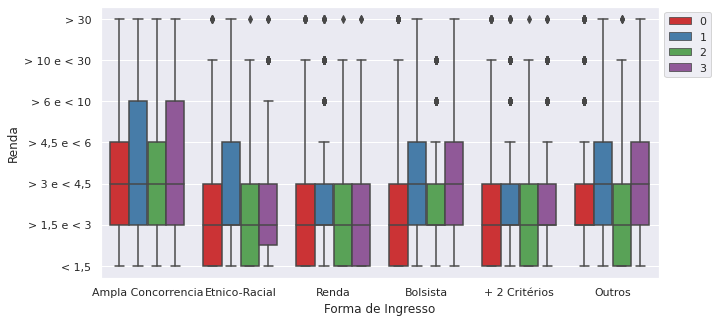

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x = df.FormaIngresso, y = df.Renda, hue = kmeans.labels_, palette = 'Set1');
plt.xlabel('Forma de Ingresso')
plt.ylabel('Renda')
plt.yticks([1,2,3,4,5,6,7],['< 1,5', '> 1,5 e < 3', '> 3 e < 4,5', '> 4,5 e < 6', '> 6 e < 10', '> 10 e < 30', '> 30'])
plt.xticks([0,1,2,3,4,5],['Ampla Concorrencia', 'Etnico-Racial', 'Renda', 'Bolsista', '+ 2 Critérios', 'Outros'])

plt.legend(loc = 2, bbox_to_anchor = (1,1))

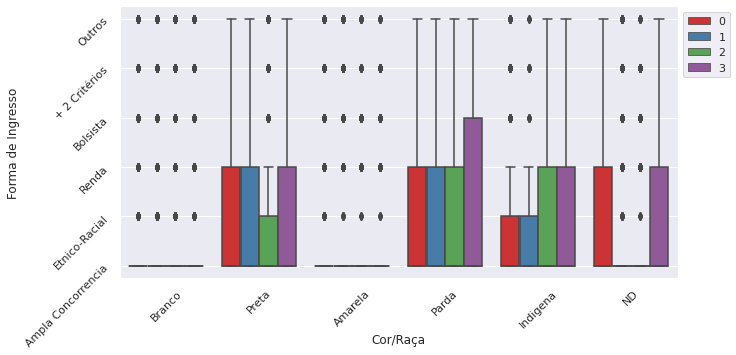

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x = df.CorRaca, y = df.FormaIngresso, hue = kmeans.labels_, palette = 'Set1');
plt.xlabel('Cor/Raça')
plt.ylabel('Forma de Ingresso')
plt.yticks([1,2,3,4,5,6],['Ampla Concorrencia', 'Etnico-Racial', 'Renda', 'Bolsista', '+ 2 Critérios', 'Outros'], rotation=45)
plt.xticks([0,1,2,3,4,5],['Branco', 'Preta', 'Amarela', 'Parda', 'Indigena', 'ND'], rotation=45)

plt.legend(loc = 2, bbox_to_anchor = (1,1))

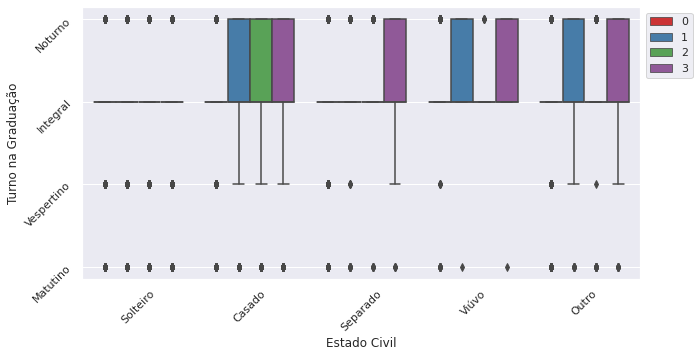

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x = df.EstadoCivil, y = df.TurnoGraduacao, hue = kmeans.labels_, palette = 'Set1')
plt.xlabel('Estado Civil')
plt.ylabel('Turno na Graduação')
plt.yticks([1,2,3,4],['Matutino', 'Vespertino', 'Integral', 'Noturno'], rotation=45)
plt.xticks([0,1,2,3,4],['Solteiro', 'Casado', 'Separado', 'Viúvo', 'Outro'], rotation=45)

plt.legend(loc = 2, bbox_to_anchor = (1,1))

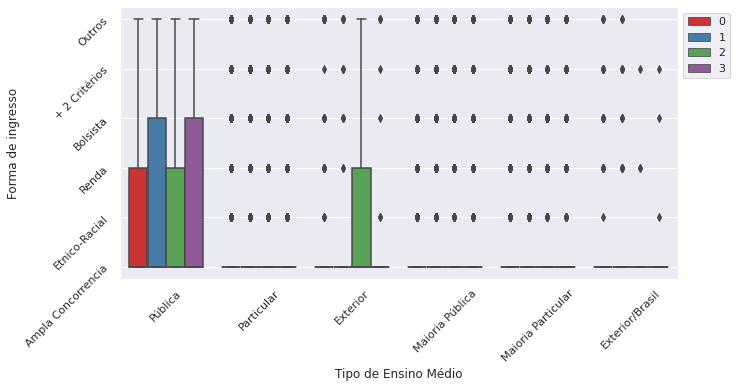

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x = df.TipoEscMed, y = df.FormaIngresso, hue = kmeans.labels_, palette = 'Set1');
plt.xlabel('Tipo de Ensino Médio')
plt.ylabel('Forma de ingresso')
plt.yticks([1,2,3,4,5,6],['Ampla Concorrencia', 'Etnico-Racial', 'Renda', 'Bolsista', '+ 2 Critérios', 'Outros'], rotation=45)
plt.xticks([0,1,2,3,4,5],['Pública', 'Particular', 'Exterior', 'Maioria Pública', 'Maioria Particular', 'Exterior/Brasil'], rotation=45)

plt.legend(loc = 2, bbox_to_anchor = (1,1))